# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
hashid = "fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89"
df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(400))
station_locations_by_hash = df[df['hash'] == hashid]
lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()
ids = station_locations_by_hash["ID"]
ids

9994     USC00200032
10004    USC00200220
10005    USC00200228
10006    USC00200230
10023    USC00200842
10031    USC00201250
10041    USC00201502
10053    USC00202308
10097    USC00203712
10127    USC00205050
10135    USC00205450
10136    USC00205451
10140    USC00205563
10149    USC00205822
10187    USC00207308
10188    USC00207312
10189    USC00207320
10203    USC00208080
10205    USC00208202
10219    USC00208972
17073    USW00004848
17322    USW00014833
17337    USW00014853
18098    USW00094889
Name: ID, dtype: object

In [65]:
df = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
df_new = df.loc[df["ID"].isin(ids)]
df_new["Date"] = pd.to_datetime(df_new["Date"])
df_new["Data_Value"] = pd.to_numeric(df_new["Data_Value"])
df_new.sort_values("Date", inplace=True)
df_new = df_new[~((df_new.Date.dt.month == 2) & (df_new.Date.dt.day == 29))]
df_new.reset_index(drop=True,inplace=True)
df_new["Month"] = pd.DatetimeIndex(df_new['Date']).month
df_new["Day"] = pd.DatetimeIndex(df_new['Date']).day
df_new["Temperature"] = df_new["Data_Value"] / 10

decade = df_new.loc[(df_new["Date"] >= '2005-01-01') & (df_new["Date"] < '2015-01-01')]

grouped_max = decade.groupby(['Month', 'Day']).max().reset_index()
grouped_min = decade.groupby(['Month', 'Day']).min().reset_index()

year_2015 = df_new.loc[(df_new["Date"] >= '2015-01-01') & (df_new['Date'] < '2016-01-01')]
year_2015_max = year_2015.groupby(['Month', 'Day']).max().reset_index()
year_2015_min = year_2015.groupby(['Month', 'Day']).min().reset_index()
record_high = year_2015_max[year_2015_max['Temperature'] > grouped_max['Temperature']]
record_low = year_2015_min[year_2015_min['Temperature'] < grouped_min['Temperature']]
record_low.head()

,Month,Day,ID,Date,Element,Data_Value,Temperature
4,1,5,USC00200032,2015-01-05,TMAX,-155,-15.5
10,1,11,USC00200032,2015-01-11,TMAX,-200,-20.0
33,2,3,USC00200032,2015-02-03,TMAX,-238,-23.8
44,2,14,USC00200032,2015-02-14,TMAX,-239,-23.9
45,2,15,USC00200032,2015-02-15,TMAX,-260,-26.0


In [80]:
# x ticks

# x ticks
xticks = pd.date_range('1/1/2015','31/12/2015', freq = 'M') - 1 + pd.Timedelta('1D') #get start of month from 2015 onwards. eg, 2015-01-01, 2015-02-01...
xticks = xticks.strftime('%-j').astype(int)

xticks_labels = pd.to_datetime(xticks, format = '%j').strftime('%b')
xticks_labels

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], 
      dtype='<U3')

<IPython.core.display.Javascript object>


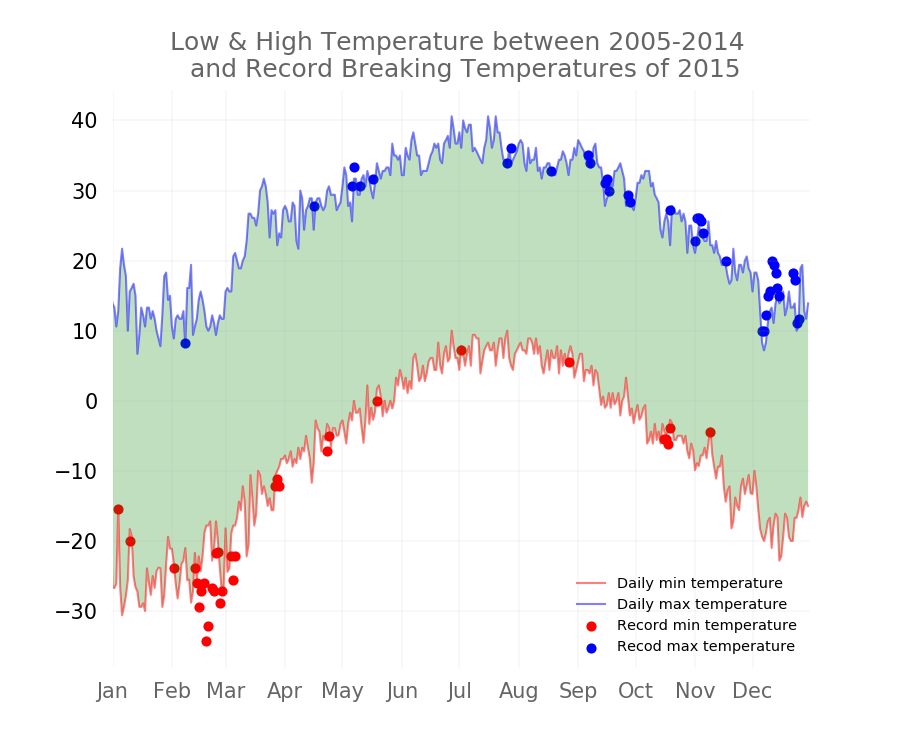

In [119]:
% matplotlib notebook

fig = plt.figure(figsize = (6,5))  
  
ax1 = plt.gca() # Primary axes

plt.scatter(record_low.index,record_low['Temperature'], color = 'r', s = 15, label = 'Record min temperature')
plt.scatter(record_high.index,record_high['Temperature'], color = 'b', s = 15, label = 'Recod max temperature')

ax1.plot(grouped_min['Temperature'], '-', color = 'r', alpha = 0.5,  linewidth=1, label = 'Daily min temperature')
ax1.plot(grouped_max['Temperature'],'-', color='b', alpha = 0.5,  linewidth=1, label = 'Daily max temperature')
ax1.fill_between(grouped_min.index, 
                       grouped_min['Temperature'], grouped_max['Temperature'], 
                       facecolor='green', 
                       alpha=0.25)
ax1.set_xlim(1,365)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks_labels, alpha = 0.6)
ax1.set_title('Low & High Temperature between 2005-2014 \n and Record Breaking Temperatures of 2015', alpha =0.6)
plt.legend(frameon = False, loc=4, fontsize = 'x-small')
ax1.grid(True, alpha = 0.1)

#Invisible frame
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
    
#remove ticks
plt.tick_params(left = 'off', bottom = 'off')
plt.show()
plt.savefig('assignment2.png')

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')